In [68]:
import torch
import math
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import torch.optim as optim
import matplotlib.pyplot as plt
import scipy.stats
from tqdm import tqdm

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [69]:
from nn_resampler import nn_resampler
from phase_est_smc import phase_est_smc

In [70]:
num_particles = 1000 # number of SMC particles (num of w points)
num_samples = 10000 # number of samples to draw from the particle distribution (to be binned)
num_bins = 100 # number of bins
n_iters = 1000 # number of different omega*
t0 = 1 # starting time
max_iters = 50 # maximum number of iterations before breaking
if_print = True

In [71]:
net = nn_resampler(100,100)
net.load_state_dict(torch.load("model/nn_resampler.model"))
net.eval();

## NN Resampler

In [72]:
omega_star_list = []
nn_pred_list = []
nn_data = []

for i in range(n_iters): 
    
    omega_star = np.random.uniform(low=-1, high =1) * np.pi
    
    omega_star_list.append(omega_star)
    smc = phase_est_smc(omega_star, t0, max_iters)
    smc.init_particles(num_particles)
    resample_counts = 0
    
    while True:
        
        particle_pos, particle_wgts = smc.particles(threshold=num_particles/5, num_measurements=1)
        bins, edges = smc.get_bins(num_bins, num_samples)
        
        if smc.break_flag:
            break
            
        nn_pred = net(torch.tensor(bins).float().unsqueeze(0)) ## convert to float tensor, then make dim [1, num_bins]
        smc.nn_bins_to_particles(nn_pred.detach().numpy(), edges)
        
        resample_counts += 1

        
#         if len(running_est) > 5:
#             last_n = running_est[-5:]
#             # np.allclose(a,b) returns true if every element in a and b are equal to a tolerance
#             # np.full_like makes an array with shake of last_n with every element being last_n[0]
#             # if all elements of last_n are equal then they should all equal the first element
#             if np.allclose(last_n, np.full_like(last_n, last_n[0])):
#                 break
    if if_print:            
        print("True omega: {:f}, prediction by NN: {:f}, num of resample calls: {:d}".format(omega_star,
                                                                                             smc.curr_omega_est,
                                                                                             resample_counts))

    while len(smc.data) < max_iters:
        smc.data.append(smc.data[-1]) # append the last estimate
    
    nn_data.append(smc.data)
    nn_pred_list.append(smc.curr_omega_est)
    
    if abs(smc.curr_omega_est) - abs(omega_star) > 1:
        print("Prediction: {:f}, actual value: {:f}. Threshold exceeded. Breaking out of loop for inspection.".
             format(smc.curr_omega_est, omega_star))
#         break

True omega: 0.274348, prediction by NN: 0.266582, num of resample calls: 4
True omega: -2.395723, prediction by NN: -2.173422, num of resample calls: 3
True omega: 0.711341, prediction by NN: -0.709340, num of resample calls: 4
True omega: 2.721094, prediction by NN: 2.740377, num of resample calls: 3
True omega: 1.791983, prediction by NN: 1.882514, num of resample calls: 4
True omega: 1.447949, prediction by NN: 1.502874, num of resample calls: 4
True omega: 2.740464, prediction by NN: -2.561455, num of resample calls: 6
True omega: -2.852851, prediction by NN: -2.574293, num of resample calls: 3
True omega: -0.119563, prediction by NN: -0.095077, num of resample calls: 4
True omega: 1.568425, prediction by NN: 1.563890, num of resample calls: 2
True omega: 2.569831, prediction by NN: 2.589805, num of resample calls: 3
True omega: 0.843734, prediction by NN: 0.843894, num of resample calls: 4
True omega: -0.664849, prediction by NN: 0.662601, num of resample calls: 3
True omega: -1.9

True omega: 0.382012, prediction by NN: 0.371447, num of resample calls: 4
True omega: 1.974255, prediction by NN: 1.972100, num of resample calls: 3
True omega: -1.974131, prediction by NN: 1.898811, num of resample calls: 5
True omega: 2.371648, prediction by NN: 2.340640, num of resample calls: 4
True omega: 2.451100, prediction by NN: 2.409221, num of resample calls: 4
True omega: 1.697431, prediction by NN: 1.709494, num of resample calls: 2
True omega: 1.303019, prediction by NN: -1.139911, num of resample calls: 4
True omega: -0.063534, prediction by NN: 0.064177, num of resample calls: 4
True omega: -1.494035, prediction by NN: 1.438781, num of resample calls: 4
True omega: -3.101285, prediction by NN: 2.895870, num of resample calls: 4
True omega: 2.758316, prediction by NN: -2.727649, num of resample calls: 3
True omega: 1.618005, prediction by NN: -1.608527, num of resample calls: 2
True omega: 1.253241, prediction by NN: 1.246416, num of resample calls: 3
True omega: -1.068

True omega: 2.080021, prediction by NN: 1.997667, num of resample calls: 5
True omega: 2.256416, prediction by NN: 2.257127, num of resample calls: 4
True omega: 2.491338, prediction by NN: 2.531115, num of resample calls: 5
True omega: 1.272696, prediction by NN: -0.952537, num of resample calls: 3
True omega: -1.647959, prediction by NN: 1.554278, num of resample calls: 5
True omega: -2.607477, prediction by NN: -2.604094, num of resample calls: 2
True omega: -0.786259, prediction by NN: -0.781112, num of resample calls: 3
True omega: 2.840259, prediction by NN: 2.834031, num of resample calls: 2
True omega: 1.667937, prediction by NN: -1.671661, num of resample calls: 2
True omega: 2.734926, prediction by NN: 2.653229, num of resample calls: 4
True omega: 2.258495, prediction by NN: -2.219426, num of resample calls: 4
True omega: -0.294408, prediction by NN: -0.292533, num of resample calls: 3
True omega: -2.814471, prediction by NN: -0.697273, num of resample calls: 3
True omega: -

True omega: -0.255704, prediction by NN: -0.437617, num of resample calls: 4
True omega: -0.196764, prediction by NN: 0.194258, num of resample calls: 4
True omega: -2.219090, prediction by NN: -1.305950, num of resample calls: 4
True omega: 1.522765, prediction by NN: -1.451601, num of resample calls: 5
True omega: 1.770707, prediction by NN: 1.757405, num of resample calls: 2
True omega: -1.492597, prediction by NN: 1.494896, num of resample calls: 3
True omega: 2.082454, prediction by NN: -1.997339, num of resample calls: 6
True omega: -0.869161, prediction by NN: 0.894112, num of resample calls: 2
True omega: 2.044530, prediction by NN: -1.992993, num of resample calls: 4
True omega: -1.579877, prediction by NN: -1.523286, num of resample calls: 2
True omega: 1.773308, prediction by NN: 1.771116, num of resample calls: 2
True omega: 0.874660, prediction by NN: -0.829102, num of resample calls: 4
True omega: 1.452499, prediction by NN: 1.419907, num of resample calls: 4
True omega: 

True omega: 1.038322, prediction by NN: -1.035540, num of resample calls: 3
True omega: 2.781433, prediction by NN: 2.629500, num of resample calls: 4
True omega: -1.854601, prediction by NN: -1.794359, num of resample calls: 3
True omega: -0.204763, prediction by NN: 0.203132, num of resample calls: 3
True omega: -0.676153, prediction by NN: 0.670012, num of resample calls: 4
True omega: 0.481126, prediction by NN: 0.481904, num of resample calls: 2
True omega: -2.926621, prediction by NN: 2.894978, num of resample calls: 2
True omega: -0.367483, prediction by NN: 0.366264, num of resample calls: 3
True omega: 0.533418, prediction by NN: -0.528483, num of resample calls: 4
True omega: 0.455498, prediction by NN: 0.454332, num of resample calls: 5
True omega: 2.791235, prediction by NN: 2.780342, num of resample calls: 4
True omega: -1.003004, prediction by NN: -0.983482, num of resample calls: 4
True omega: 2.048728, prediction by NN: -1.986337, num of resample calls: 6
True omega: -1

True omega: -2.695693, prediction by NN: -2.695892, num of resample calls: 2
True omega: -1.604403, prediction by NN: -1.607039, num of resample calls: 3
True omega: 1.818451, prediction by NN: 1.819476, num of resample calls: 2
True omega: -0.961132, prediction by NN: -0.962564, num of resample calls: 2
True omega: 1.828926, prediction by NN: 1.828974, num of resample calls: 3
True omega: 1.842219, prediction by NN: 1.841755, num of resample calls: 2
True omega: -2.970180, prediction by NN: -2.643650, num of resample calls: 2
True omega: 0.183965, prediction by NN: 0.183315, num of resample calls: 3
True omega: -0.980440, prediction by NN: -0.965118, num of resample calls: 3
True omega: 3.113028, prediction by NN: 3.048284, num of resample calls: 3
True omega: -2.281470, prediction by NN: -2.043585, num of resample calls: 5
True omega: 2.491593, prediction by NN: 2.465310, num of resample calls: 4
True omega: 1.795499, prediction by NN: -1.796055, num of resample calls: 4
True omega: 

True omega: 1.854986, prediction by NN: 1.831275, num of resample calls: 3
True omega: 3.010889, prediction by NN: -3.016871, num of resample calls: 2
True omega: 1.169261, prediction by NN: 1.168401, num of resample calls: 4
True omega: 2.120789, prediction by NN: -1.919965, num of resample calls: 4
True omega: -0.484561, prediction by NN: 0.482927, num of resample calls: 5
True omega: 1.840934, prediction by NN: -1.846929, num of resample calls: 2
True omega: -1.266023, prediction by NN: -1.261963, num of resample calls: 3
True omega: 0.420874, prediction by NN: 0.418911, num of resample calls: 4
True omega: -1.174022, prediction by NN: -0.305892, num of resample calls: 5
True omega: -1.271219, prediction by NN: 1.271533, num of resample calls: 4
True omega: 2.236388, prediction by NN: 2.243584, num of resample calls: 3
True omega: -0.310343, prediction by NN: -0.311333, num of resample calls: 3
True omega: -1.186976, prediction by NN: -0.994883, num of resample calls: 6
True omega: 

True omega: 2.440052, prediction by NN: -2.254143, num of resample calls: 4
True omega: -1.464338, prediction by NN: -1.465261, num of resample calls: 3
True omega: -2.237700, prediction by NN: 2.232386, num of resample calls: 2
True omega: 0.720878, prediction by NN: -0.569176, num of resample calls: 4
True omega: 1.736093, prediction by NN: 1.712591, num of resample calls: 3
True omega: 1.078535, prediction by NN: 1.075017, num of resample calls: 3
True omega: -1.113450, prediction by NN: -1.083765, num of resample calls: 4
True omega: -1.572146, prediction by NN: -1.547582, num of resample calls: 3
True omega: -2.945135, prediction by NN: 2.727801, num of resample calls: 6
True omega: 1.655967, prediction by NN: -1.653556, num of resample calls: 3
True omega: 2.937741, prediction by NN: -2.925121, num of resample calls: 3
True omega: 0.937825, prediction by NN: -0.928090, num of resample calls: 4
True omega: 0.204217, prediction by NN: -0.205796, num of resample calls: 3
True omega:

In [74]:
nn_mse = np.mean( abs(np.array(omega_star_list)) - abs(np.array(nn_pred_list)) ) ** 2
print(nn_mse)

0.005800306249132488


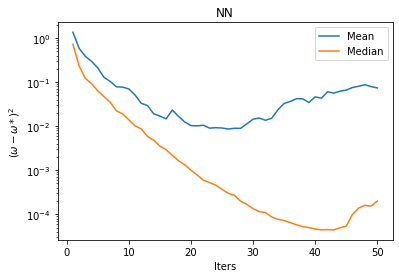

In [75]:
nn_data_squared = ( abs(np.array(nn_data)) - abs(np.array(omega_star_list)).reshape(-1,1)) ** 2 
nn_data_mean = np.mean(nn_data_squared, axis=0)
nn_data_median = np.median(nn_data_squared, axis =0)

num_data_points = nn_data_squared.shape[1]

plt.plot(np.arange(1,num_data_points+1, dtype=int), nn_data_mean, label='Mean')
plt.plot(np.arange(1,num_data_points+1, dtype=int), nn_data_median, label='Median')
plt.legend()
plt.title("NN")
plt.yscale('log')
plt.xlabel("Iters")
plt.ylabel("$(\omega - \omega*)^2$")
plt.show()

## Liu-West resampler

In [76]:
omega_star_list = []
lw_pred_list = []
lw_data = []

for i in range(n_iters): 
    omega_star = np.random.uniform(low=-1, high=1) * np.pi
    
    omega_star_list.append(omega_star)
    smc = phase_est_smc(omega_star, t0, max_iters)
    smc.init_particles(num_particles)
    
    resample_counts = 0
    
    while True:

        particle_pos, particle_wgts = smc.particles(threshold=num_particles/10, num_measurements=1)
        smc.liu_west_resample()
    
        resample_counts += 1 
        
        curr_omega_est = smc.particle_pos[np.argmax(smc.particle_wgts)]
        if smc.break_flag == True:
            break
        
#         if len(running_est) > 5:
#             last_5 = running_est[-5:]
#             # np.allclose(a,b) returns true if every element in a and b are equal to a tolerance
#             # np.full_like makes an array with shape of last_10 with every element being last_10[0]
#             # if all elements of last_10 are equal then they should all equal the first element
#             if np.allclose(last_5, np.full_like(last_5, last_5[0])):
#                 break
                
      
    if if_print:            
        print("True omega: {:f}, prediction by NN: {:f}, num of resample calls: {:d}".format(omega_star,
                                                                                             smc.curr_omega_est,
                                                                                             resample_counts))

    while len(smc.data) < max_iters:
        smc.data.append(smc.data[-1]) # append the last estimate

    lw_data.append(smc.data)
    lw_pred_list.append(smc.curr_omega_est)
    
    if abs(smc.curr_omega_est) - abs(omega_star) > 1:
        print("Prediction: {:f}, actual value: {:f}. Threshold exceeded. Breaking out of loop for inspection.".
             format(smc.curr_omega_est, omega_star))
#         break
    

True omega: -0.989527, prediction by NN: 0.529329, num of resample calls: 6
True omega: 1.427887, prediction by NN: -1.199443, num of resample calls: 6
True omega: 1.163075, prediction by NN: 0.791438, num of resample calls: 6
True omega: -2.924223, prediction by NN: -3.112846, num of resample calls: 6
True omega: 0.442405, prediction by NN: 0.289237, num of resample calls: 5
True omega: 3.015625, prediction by NN: 0.791426, num of resample calls: 7
True omega: 0.057389, prediction by NN: -0.057646, num of resample calls: 3
True omega: -1.850640, prediction by NN: -1.081245, num of resample calls: 6
True omega: -0.136616, prediction by NN: -0.135529, num of resample calls: 4
True omega: -3.036039, prediction by NN: -0.294388, num of resample calls: 8
True omega: -1.674671, prediction by NN: -2.026860, num of resample calls: 6
True omega: 0.415056, prediction by NN: 0.356719, num of resample calls: 5
True omega: -0.276641, prediction by NN: -0.476664, num of resample calls: 5
True omega

True omega: -0.293771, prediction by NN: -0.274772, num of resample calls: 4
True omega: -0.980469, prediction by NN: 1.198920, num of resample calls: 6
True omega: -2.813408, prediction by NN: -1.664962, num of resample calls: 7
True omega: -1.597509, prediction by NN: -0.791549, num of resample calls: 6
True omega: 1.940584, prediction by NN: -2.583340, num of resample calls: 7
True omega: -0.608944, prediction by NN: 0.796473, num of resample calls: 5
True omega: -0.459769, prediction by NN: 0.253739, num of resample calls: 5
True omega: -1.362176, prediction by NN: -1.995472, num of resample calls: 8
True omega: -0.202267, prediction by NN: 0.180823, num of resample calls: 5
True omega: 2.245360, prediction by NN: 0.532913, num of resample calls: 6
True omega: 2.220577, prediction by NN: 3.189580, num of resample calls: 7
True omega: 0.731510, prediction by NN: 0.394418, num of resample calls: 5
True omega: -1.458167, prediction by NN: 1.365154, num of resample calls: 6
True omega:

True omega: -3.134974, prediction by NN: -1.081063, num of resample calls: 7
True omega: -2.480491, prediction by NN: 1.736557, num of resample calls: 6
True omega: 1.688320, prediction by NN: -1.877567, num of resample calls: 6
True omega: 1.821950, prediction by NN: 1.561138, num of resample calls: 6
True omega: 0.047436, prediction by NN: -0.047277, num of resample calls: 4
True omega: 2.788514, prediction by NN: 1.452583, num of resample calls: 7
True omega: 2.431894, prediction by NN: 3.623918, num of resample calls: 7
Prediction: 3.623918, actual value: 2.431894. Threshold exceeded. Breaking out of loop for inspection.
True omega: -1.872710, prediction by NN: 2.524520, num of resample calls: 7
True omega: 0.593183, prediction by NN: -0.855388, num of resample calls: 5
True omega: 0.183862, prediction by NN: 0.212367, num of resample calls: 5
True omega: -3.109968, prediction by NN: -3.768599, num of resample calls: 6
True omega: 1.914529, prediction by NN: -1.841094, num of resam

True omega: 1.670793, prediction by NN: 1.958509, num of resample calls: 6
True omega: 1.121134, prediction by NN: 1.040023, num of resample calls: 6
True omega: -0.525405, prediction by NN: -0.135118, num of resample calls: 5
True omega: 0.706582, prediction by NN: -0.814356, num of resample calls: 6
True omega: 0.476720, prediction by NN: 0.479571, num of resample calls: 6
True omega: 0.419323, prediction by NN: -0.357070, num of resample calls: 5
True omega: -1.342859, prediction by NN: 1.127294, num of resample calls: 6
True omega: -0.013836, prediction by NN: 0.014360, num of resample calls: 3
True omega: -2.951816, prediction by NN: -1.358671, num of resample calls: 6
True omega: -2.409529, prediction by NN: -0.154623, num of resample calls: 6
True omega: 0.682800, prediction by NN: 0.248928, num of resample calls: 5
True omega: 1.534876, prediction by NN: -1.288269, num of resample calls: 6
True omega: -0.937881, prediction by NN: -1.116861, num of resample calls: 6
True omega: 

True omega: -2.267211, prediction by NN: -1.370534, num of resample calls: 7
True omega: 1.292476, prediction by NN: 0.434330, num of resample calls: 6
True omega: -0.749237, prediction by NN: 0.749960, num of resample calls: 5
True omega: -0.368595, prediction by NN: 0.918416, num of resample calls: 7
True omega: -1.404588, prediction by NN: -2.434035, num of resample calls: 7
Prediction: -2.434035, actual value: -1.404588. Threshold exceeded. Breaking out of loop for inspection.
True omega: 2.391852, prediction by NN: -2.176432, num of resample calls: 7
True omega: 1.295673, prediction by NN: -0.986649, num of resample calls: 6
True omega: -1.310220, prediction by NN: -1.556321, num of resample calls: 6
True omega: -0.447824, prediction by NN: 0.430641, num of resample calls: 5
True omega: 2.975484, prediction by NN: 3.397935, num of resample calls: 7
True omega: 2.004374, prediction by NN: -3.588023, num of resample calls: 7
Prediction: -3.588023, actual value: 2.004374. Threshold e

True omega: 2.456644, prediction by NN: -2.375221, num of resample calls: 7
True omega: 0.555003, prediction by NN: 0.651429, num of resample calls: 6
True omega: 2.683416, prediction by NN: -2.175973, num of resample calls: 6
True omega: -1.182232, prediction by NN: -0.837265, num of resample calls: 6
True omega: -0.404610, prediction by NN: 0.566508, num of resample calls: 5
True omega: 2.566538, prediction by NN: -2.918432, num of resample calls: 6
True omega: -1.759836, prediction by NN: 0.708931, num of resample calls: 6
True omega: 0.697955, prediction by NN: 0.769120, num of resample calls: 6
True omega: -0.882205, prediction by NN: 1.234901, num of resample calls: 5
True omega: 1.588771, prediction by NN: 1.695651, num of resample calls: 6
True omega: 1.412099, prediction by NN: 2.425005, num of resample calls: 7
Prediction: 2.425005, actual value: 1.412099. Threshold exceeded. Breaking out of loop for inspection.
True omega: -0.162472, prediction by NN: 0.162225, num of resamp

True omega: 2.608776, prediction by NN: -1.453058, num of resample calls: 6
True omega: -1.181899, prediction by NN: -0.791210, num of resample calls: 6
True omega: 0.808263, prediction by NN: 0.556489, num of resample calls: 6
True omega: -2.467928, prediction by NN: -1.330126, num of resample calls: 7
True omega: -1.641973, prediction by NN: -0.980978, num of resample calls: 6
True omega: -1.050337, prediction by NN: 1.122400, num of resample calls: 6
True omega: 2.792248, prediction by NN: -3.723055, num of resample calls: 7
True omega: 2.079896, prediction by NN: 2.646371, num of resample calls: 6
True omega: -0.472769, prediction by NN: 0.270864, num of resample calls: 5
True omega: 1.692750, prediction by NN: 1.773538, num of resample calls: 6
True omega: 0.252378, prediction by NN: 0.325734, num of resample calls: 5
True omega: -0.886252, prediction by NN: -0.317405, num of resample calls: 5
True omega: -2.063683, prediction by NN: -1.991821, num of resample calls: 6
True omega:

True omega: -1.391182, prediction by NN: -1.194425, num of resample calls: 6
True omega: -2.356267, prediction by NN: 2.818587, num of resample calls: 7
True omega: 1.054787, prediction by NN: 0.248044, num of resample calls: 6
True omega: -1.623207, prediction by NN: 2.646954, num of resample calls: 6
Prediction: 2.646954, actual value: -1.623207. Threshold exceeded. Breaking out of loop for inspection.
True omega: -1.692212, prediction by NN: 2.031696, num of resample calls: 6
True omega: -2.159161, prediction by NN: -2.917787, num of resample calls: 6
True omega: 2.892877, prediction by NN: -2.592859, num of resample calls: 6
True omega: 2.410345, prediction by NN: -2.067916, num of resample calls: 6
True omega: -0.869131, prediction by NN: 1.033345, num of resample calls: 5
True omega: -0.382465, prediction by NN: -0.371706, num of resample calls: 5
True omega: -0.888608, prediction by NN: 1.271589, num of resample calls: 6
True omega: -0.826493, prediction by NN: 0.791598, num of 

True omega: 2.567522, prediction by NN: 3.085523, num of resample calls: 7
True omega: 1.971030, prediction by NN: -1.174363, num of resample calls: 6
True omega: -0.469928, prediction by NN: -0.244311, num of resample calls: 6
True omega: -2.097812, prediction by NN: -0.723877, num of resample calls: 7
True omega: 2.503304, prediction by NN: -1.533728, num of resample calls: 7
True omega: 1.876317, prediction by NN: 2.817872, num of resample calls: 6
True omega: 3.138110, prediction by NN: 1.814811, num of resample calls: 7
True omega: -2.464213, prediction by NN: -4.012758, num of resample calls: 6
Prediction: -4.012758, actual value: -2.464213. Threshold exceeded. Breaking out of loop for inspection.
True omega: -2.281209, prediction by NN: 3.121717, num of resample calls: 7
True omega: 3.048647, prediction by NN: 2.046507, num of resample calls: 7
True omega: 0.672746, prediction by NN: -0.332745, num of resample calls: 5
True omega: -2.231020, prediction by NN: 1.959327, num of re

True omega: -2.388126, prediction by NN: 0.796432, num of resample calls: 6
True omega: -2.318263, prediction by NN: -1.559878, num of resample calls: 6
True omega: -1.706760, prediction by NN: 0.547723, num of resample calls: 6
True omega: -2.512148, prediction by NN: 4.013336, num of resample calls: 6
Prediction: 4.013336, actual value: -2.512148. Threshold exceeded. Breaking out of loop for inspection.
True omega: 2.776891, prediction by NN: -1.339164, num of resample calls: 7
True omega: -0.429979, prediction by NN: -0.357417, num of resample calls: 6
True omega: -2.169557, prediction by NN: -1.800638, num of resample calls: 7
True omega: 1.020157, prediction by NN: -1.194451, num of resample calls: 6
True omega: 1.404406, prediction by NN: 2.471291, num of resample calls: 6
Prediction: 2.471291, actual value: 1.404406. Threshold exceeded. Breaking out of loop for inspection.
True omega: -1.320720, prediction by NN: -2.316765, num of resample calls: 6
True omega: 1.083046, predicti

In [78]:
lw_mse = np.mean( abs(np.array(omega_star_list)) - abs(np.array(lw_pred_list))) ** 2
print(lw_mse)

0.027666558142655957


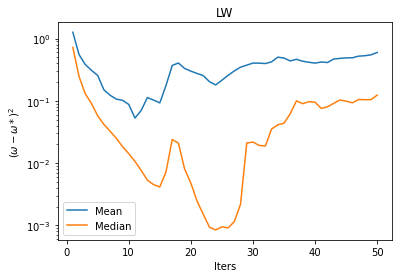

In [79]:
lw_data_squared = ( abs(np.array(lw_data)) - abs(np.array(omega_star_list)).reshape(-1,1)) ** 2 
lw_data_mean = np.mean(lw_data_squared, axis=0)
lw_data_median = np.median(lw_data_squared, axis =0)

num_data_points = lw_data_squared.shape[1]

plt.plot(np.arange(1,num_data_points+1, dtype=int), lw_data_mean, label='Mean')
plt.plot(np.arange(1,num_data_points+1, dtype=int), lw_data_median, label='Median')
plt.legend()
plt.title("LW")
plt.xlabel("Iters")
plt.ylabel("$(\omega - \omega*)^2$")
plt.yscale('log')
plt.show()